<a href="https://colab.research.google.com/github/nalgo-intern/kyushu/blob/main/nishimura_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
git clone https://github.com/libgit2/libgit2

In [ ]:
!unzip dataset.zip #解凍：ここを変更。「dataset」のところをアップロードしたzipファイル名に変更してください。　- ファイルを消す場合「!rm data.zip」

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [11]:
#1 ライブラリのインポート等

import keras
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
#from keras.utils import plot_model #これはKerasのバージョンなどにより使えないのでコメントアウト
from keras.utils import np_utils #keras.utils.to_categoricalでエラーが出るので追加
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import time

In [12]:
#2 各種設定 

train_data_path = 'dataset' # ここを変更。Colaboratoryにアップロードしたzipファイルを解凍後の、データセットのフォルダ名を入力

image_size = 80 # ここを変更。必要に応じて変更してください。「28」を指定した場合、縦28横28ピクセルの画像に変換します。

color_setting = 3  #ここを変更。データセット画像のカラー：「1」はモノクロ・グレースケール。「3」はカラー。

folder = ['high', 'mid', 'low'] # ここを変更。データセット画像のフォルダ名（クラス名）を半角英数で入力

class_number = len(folder)
print('今回のデータで分類するクラス数は「', str(class_number), '」です。')


今回のデータで分類するクラス数は「 3 」です。


In [13]:
#3 データセットの読み込みとデータ形式の設定・正規化・分割 

X_image = []  
Y_label = [] 
for index, name in enumerate(folder):
  read_data = train_data_path + '/' + name
  files = glob.glob(read_data + '/*.png') #ここを変更。png形式のファイルを利用する場合のサンプルです。
  print('--- 読み込んだデータセットは', read_data, 'です。')

  for i, file in enumerate(files):  
    if color_setting == 1:
      img = load_img(file, color_mode = 'grayscale' ,target_size=(image_size, image_size))  
    elif color_setting == 3:
      img = load_img(file, color_mode = 'rgb' ,target_size=(image_size, image_size))
    array = img_to_array(img)
    X_image.append(array)
    Y_label.append(index)

X_image = np.array(X_image)
Y_label = np.array(Y_label)

X_image = X_image.astype('float32') / 255
#Y_label = keras.utils.to_categorical(Y_label, class_number) #Kerasのバージョンなどにより使えないのでコメントアウト
Y_label = np_utils.to_categorical(Y_label, class_number) #上記のコードのかわり

train_images, valid_images, train_labels, valid_labels = train_test_split(X_image, Y_label, test_size=0.10)
x_train = train_images
y_train = train_labels
x_test = valid_images
y_test = valid_labels

--- 読み込んだデータセットは dataset/high です。
--- 読み込んだデータセットは dataset/mid です。
--- 読み込んだデータセットは dataset/low です。


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 80, 80, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 40, 40, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 40, 40, 128)       18560     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 40, 40, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 20, 20, 256)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 20, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 102400)           

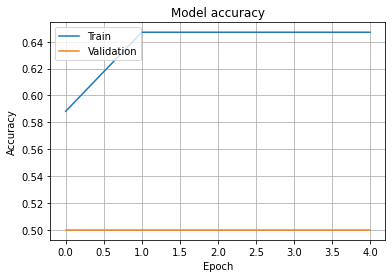

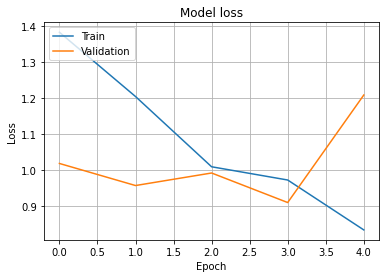

Loss: 1.2077124118804932 （損失関数値 - 0に近いほど正解に近い）
Accuracy: 50.0 % （精度 - 100% に近いほど正解に近い）
Computation time（計算時間）:14.789 sec（秒）


In [14]:
#4 機械学習（人工知能）モデルの作成 – 畳み込みニューラルネットワーク（CNN）・学習の実行等

model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same',
          input_shape=(image_size, image_size, color_setting), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))               
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                
model.add(Dropout(0.5))                                   
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))                                 
model.add(Dense(class_number, activation='softmax'))

model.summary()
#plot_model(model, to_file='model.png') #ここはKerasのバージョンなどにより使えないのでコメントアウト

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

start_time = time.time()

# ここを変更。必要に応じて「batch_size=」「epochs=」の数字を変更してみてください。
history = model.fit(x_train,y_train, batch_size=2, epochs=5, verbose=1, validation_data=(x_test, y_test))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

open('cnn_model.json','w').write(model.to_json())
model.save_weights('cnn_weights.h5') 
#model.save('cnn_model_weight.h5') #モデル構造と重みを1つにまとめることもできます

score = model.evaluate(x_test, y_test, verbose=0)
print('Loss:', score[0], '（損失関数値 - 0に近いほど正解に近い）') 
print('Accuracy:', score[1] * 100, '%', '（精度 - 100% に近いほど正解に近い）') 
print('Computation time（計算時間）:{0:.3f} sec（秒）'.format(time.time() - start_time))